<a href="https://colab.research.google.com/github/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/blob/main/Diabetes_Prediction_System_(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_curve, auc


Uploading CSV file


In [78]:
url = 'https://raw.githubusercontent.com/AlSamirShuvo/Diavetes_Prediction_using_ML-299-/refs/heads/main/diabetes_prediction_dataset.csv'
Diabetes_dataset = pd.read_csv(url)

In [79]:
Diabetes_dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [80]:
viz = Diabetes_dataset.copy()

In [81]:
Diabetes_dataset.shape

(100000, 9)

In [82]:
print(" Summary Statistics:")
print(Diabetes_dataset.describe())

 Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [83]:
print(" Diabetes Class Distribution (in %):")
print(Diabetes_dataset['diabetes'].value_counts(normalize=True) * 100)
print(Diabetes_dataset['diabetes'].value_counts())

 Diabetes Class Distribution (in %):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64
diabetes
0    91500
1     8500
Name: count, dtype: int64


In [84]:
# Value counts for categorical variables
print(" Gender Distribution:")
print(Diabetes_dataset['gender'].value_counts())

 Gender Distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [85]:
print(" Smoking History Distribution:")
print(Diabetes_dataset['smoking_history'].value_counts())

 Smoking History Distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


Checking missing values



In [86]:
print(Diabetes_dataset.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [87]:
Diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Separating data and lebel


In [88]:
train, test = train_test_split(Diabetes_dataset, test_size = 0.2)

In [89]:
train.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
20170,Male,34.0,0,0,not current,27.32,6.0,100,0
64553,Male,61.0,0,0,current,27.32,6.5,90,0
19459,Female,61.0,0,0,No Info,27.32,4.5,126,0
90682,Male,56.0,0,0,No Info,36.58,5.0,100,0
63829,Male,64.0,0,0,current,20.30,6.1,130,0
26739,Female,21.0,0,0,never,28.89,5.7,159,0
74832,Male,45.0,0,0,never,33.08,6.6,100,0
70102,Male,51.0,0,0,not current,27.32,3.5,155,0
87527,Female,19.0,0,0,current,19.53,4.8,159,0
45906,Female,60.0,0,0,former,32.34,6.0,145,0


In [90]:
test.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9994,Female,80.0,1,0,never,27.85,6.1,126,0
31149,Male,64.0,0,0,former,28.75,6.8,155,1
24119,Male,15.0,0,0,No Info,20.70,6.2,159,0
65721,Male,28.0,0,0,current,33.88,5.7,90,0
6858,Female,30.0,0,0,current,27.32,4.8,90,0
88618,Male,43.0,0,0,current,27.32,4.5,85,0
56888,Female,33.0,0,0,never,25.15,4.5,100,0
89709,Female,7.0,0,0,never,18.20,6.2,140,0
41704,Male,4.0,0,0,No Info,18.01,6.5,90,0
72883,Female,65.0,0,0,former,21.05,6.6,158,0


Encoding String (Categorical) Columns in X

In [91]:
le = LabelEncoder()

# Detect categorical columns (like gender, smoking_history, etc.)
cat_cols = train.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols)

# Apply Label Encoding to each categorical column
for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])


Categorical columns: Index(['gender', 'smoking_history'], dtype='object')


In [92]:
train.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
20170,1,34.0,0,0,5,27.32,6.0,100,0
64553,1,61.0,0,0,1,27.32,6.5,90,0
19459,0,61.0,0,0,0,27.32,4.5,126,0
90682,1,56.0,0,0,0,36.58,5.0,100,0
63829,1,64.0,0,0,1,20.30,6.1,130,0
26739,0,21.0,0,0,4,28.89,5.7,159,0
74832,1,45.0,0,0,4,33.08,6.6,100,0
70102,1,51.0,0,0,5,27.32,3.5,155,0
87527,0,19.0,0,0,1,19.53,4.8,159,0
45906,0,60.0,0,0,3,32.34,6.0,145,0


In [93]:
test.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
9994,0,80.0,1,0,4,27.85,6.1,126,0
31149,1,64.0,0,0,3,28.75,6.8,155,1
24119,1,15.0,0,0,0,20.70,6.2,159,0
65721,1,28.0,0,0,1,33.88,5.7,90,0
6858,0,30.0,0,0,1,27.32,4.8,90,0
88618,1,43.0,0,0,1,27.32,4.5,85,0
56888,0,33.0,0,0,4,25.15,4.5,100,0
89709,0,7.0,0,0,4,18.20,6.2,140,0
41704,1,4.0,0,0,0,18.01,6.5,90,0
72883,0,65.0,0,0,3,21.05,6.6,158,0


Gender

Male-> 1

Female-> 0



Smoking History

No info-> 0

Current-> 1

ever-> 2

Former-> 3

Never-> 4

Not current-> 5

In [94]:
x_train = train.drop('diabetes', axis=1)
x_test = test.drop('diabetes', axis=1)


In [95]:
y_train = train['diabetes']
y_test = test['diabetes']

XGBoost Model

In [96]:
XGB_model = XGBClassifier(eval_metric='logloss')

In [97]:
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [98]:
y_pred = XGB_model.predict(x_test)


In [99]:
result = XGB_model.predict([[1, 35, 1, 0, 1, 24, 5, 80]])
print(result)

[0]


In [100]:
result = XGB_model.predict([[0, 33, 0, 0, 5, 60, 7.2, 180]])
print(result)

[1]


Evaluating the model


In [101]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = log_loss(y_test, y_pred)
print("log loss:", accuracy)


Accuracy: 0.9707
log loss: 1.0560790443011328


In [102]:
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))


              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     18311
    Diabetic       0.95      0.69      0.80      1689

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



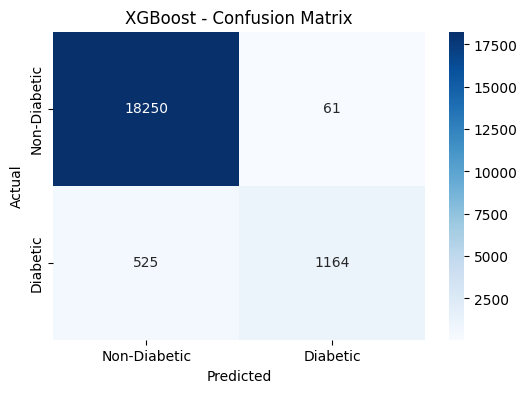

In [103]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Visualisation**

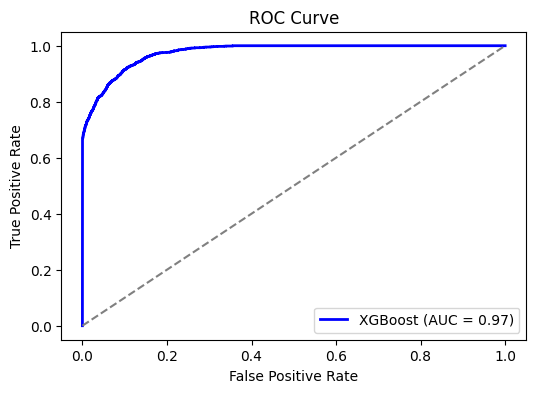

In [104]:
y_probs = XGB_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

